In [2]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys
from collections import Counter
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\manya\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [48]:
import spacy 
from spacy import displacy

In [3]:
directory = 'C://Users//manya//Documents//NLP//'

In [4]:
df = pd.read_pickle(directory+'news_cat.pkl')
df.head(5)

,crawled,language,text,title
0,2018-01-30T23:03:51.004+02:00,english,by Abhishek K Global Telehandler Market 2023 D...,Global Telehandler Market 2023 Demand by Segme...
1,2018-01-30T23:06:46.024+02:00,english,favorite this post 2014 Caterpillar 314E LCR h...,2014 Caterpillar 314E LCR
2,2018-01-30T23:18:35.023+02:00,english,By: MAX NISEN The Amazon health care threat ha...,"Amazon, Berkshire, JPMorgan health announcemen..."
3,2018-01-30T23:20:54.012+02:00,english,QR Code Link to This Post MONTHLY PUBLIC AUCTI...,2005 Caterpillar CB534D Tandem Vibratory Rolle...
4,2018-01-30T23:28:30.000+02:00,english,QR Code Link to This Post 2007 CATERPILLAR D4G...,2007 CATERPILLAR D4G LGP CAB SCREEN/SWEEPS - O...


In [8]:
language = df['language']
language.unique()

array(['english'], dtype=object)

In [11]:
text = df['text']
text.head()

0    by Abhishek K Global Telehandler Market 2023 D...
1    favorite this post 2014 Caterpillar 314E LCR h...
2    By: MAX NISEN The Amazon health care threat ha...
3    QR Code Link to This Post MONTHLY PUBLIC AUCTI...
4    QR Code Link to This Post 2007 CATERPILLAR D4G...
Name: text, dtype: object

In [11]:
split = (" ".join(df['text']))

In [12]:
type(split)

str

In [13]:
split

'by Abhishek K Global Telehandler Market 2023 Demand by Segment, Swot Analysis, Major Customer Survey & Demand Forecast \nThe Global Telehandler Market report contains Market Revenue, Investment Opportunity, Market Features, Market Demand by Segment & Telehandler market Growth aspects. A wide variety of applications, Utilization ratio, Supply and demand analysis are also consist in the report. It shows manufacturing capacity, Telehandler Price during the Forecast period from 2018 to 2023. \nThe global Telehandler market is expected to reach USD XX million by 2023 at a CAGR of YY % during the forecasted period. \nTelehandler Market by Manufacturers, Countries, Type and Application, forecast to 2023 to its research database. This research study is segmented on the bases of applications, technology, geography and types. \nAsk Sample PDF of Telehandler Market Report at: https://www.absolutereports.com/enquiry/request-sample/11643343 \nTelehandler Market by Companies: JLG, JCB, Caterpillar,

In [14]:
entities = []
labels = []
for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(split)), binary = True):
    if hasattr(chunk, 'label'):
        entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
        labels.append(chunk.label())

#entities_labels = list(zip(entities, labels))
entities_labels = list(set(zip(entities, labels))) #unique entities

In [19]:
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]
entities_df.head()

,Entities,Labels
0,Aleigha Pendleton,PERSON
1,Robert Andrews,PERSON
2,Frankfurt,PERSON
3,Equipment Exhibition,ORGANIZATION
4,Total Cases,ORGANIZATION


### Alternative NER, separating by sentenses first, then by tokens

In [25]:
entities = []
labels = []

for sent in nltk.sent_tokenize(split):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
            labels.append(chunk.label())

#entities_labels = list(zip(entities, labels))
s_entities_labels = list(set(zip(entities, labels))) #unique entities

In [26]:
s_entities_df = pd.DataFrame(s_entities_labels)
s_entities_df.columns = ["Entities", "Labels"]
s_entities_df.head()

,Entities,Labels
0,Aleigha Pendleton,PERSON
1,Robert Andrews,PERSON
2,Frankfurt,PERSON
3,Equipment Exhibition,ORGANIZATION
4,Total Cases,ORGANIZATION


In [24]:
s_entities_df.head(30)

,Entities,Labels
0,Aleigha Pendleton,PERSON
1,Robert Andrews,PERSON
2,Frankfurt,PERSON
3,Equipment Exhibition,ORGANIZATION
4,Total Cases,ORGANIZATION
5,Wealthsource,GSP
6,Nash,PERSON
7,Megastructure,GPE
8,Dec,PERSON
9,Issues,PERSON


In [23]:
labels = entities_df['Labels']
labels.unique()

array(['PERSON', 'ORGANIZATION', 'GSP', 'GPE', 'FACILITY', 'LOCATION'],
      dtype=object)

In [30]:
place = entities_df['Labels'] != "PERSON"
Place = entities_df.loc[place]

In [31]:
Place.head(30)

,Entities,Labels
3,Equipment Exhibition,ORGANIZATION
4,Total Cases,ORGANIZATION
5,Wealthsource,GSP
7,Megastructure,GPE
10,CA,ORGANIZATION
12,Drill,GPE
14,New China International Exhibition Centre,ORGANIZATION
16,Journal Star,ORGANIZATION
17,Auction,ORGANIZATION
20,Pennsylvania,GPE


In [32]:
Place.groupby("Entities").count()

,Labels
Entities,
AAPL,1
AAR,1
ABC Online Full Coverage Flag,1
ABELSON,1
ABSOLUTELY,1
ABT Trac Fin Zero,1
ACCEPTED,1
ACCESSWIRE,1
ACCESSWIRE By Vista Partners,1


In [37]:
orgs = entities_df['Labels'] == "ORGANIZATION"
Orgs = entities_df.loc[orgs]

In [38]:
Counter(Orgs["Entities"]).most_common(50)

[('Equipment Exhibition', 1),
 ('Total Cases', 1),
 ('CA', 1),
 ('New China International Exhibition Centre', 1),
 ('Journal Star', 1),
 ('Auction', 1),
 ('CATERPILLAR C15', 1),
 ('Machinery', 1),
 ('AET', 1),
 ('ONLY', 1),
 ('Caterpillar While', 1),
 ('Caterpillar For', 1),
 ('ISPO Award', 1),
 ('CONNECT', 1),
 ('HOW', 1),
 ('Kaiser Family Foundation', 1),
 ('SWOT Analysis', 1),
 ('Blowfish', 1),
 ('www.PJStar.com', 1),
 ('AVAILABLE', 1),
 ('DPR', 1),
 ('Manufacturers', 1),
 ('Seaport Global Securities', 1),
 ('University', 1),
 ('RPM', 1),
 ('Fund Management', 1),
 ('Utility', 1),
 ('FOMC', 1),
 ('Affordable Care Act', 1),
 ('Arcadia Spider', 1),
 ('Completes Ergonomic Assessments', 1),
 ('WMT', 1),
 ('Antique Flower Pot', 1),
 ('MMM Total Return', 1),
 ('Bank', 1),
 ('NIGC', 1),
 ('STANDBY', 1),
 ('WFG Advisors', 1),
 ('Union', 1),
 ('SOLD', 1),
 ('Inc', 1),
 ('IMO', 1),
 ('Partners Investment Group', 1),
 ('Maintenance Cost Availability', 1),
 ('MGMT', 1),
 ('GREG', 1),
 ('www.I35E

In [36]:
Counter(Place["Entities"]).most_common(100)
#topwords = c.Counter(keywords).most_common(30)
#topwords = pd.DataFrame(topwords)

[('US', 3),
 ('Peoria', 2),
 ('Adelphia', 2),
 ('RESISTANCE', 2),
 ('Bank', 2),
 ('Company', 2),
 ('Ultra', 2),
 ('Beatles', 2),
 ('Wonderland', 2),
 ('News', 2),
 ('Amazon', 2),
 ('Author', 2),
 ('Noise', 2),
 ('Palmer', 2),
 ('Foreigner', 2),
 ('Land', 2),
 ('Downstream', 2),
 ('Bye', 2),
 ('Vetr', 2),
 ('Technology', 2),
 ('Market', 2),
 ('Nasdaq', 2),
 ('Cab', 2),
 ('Demand', 2),
 ('Land Rover', 2),
 ('Caterpillar', 2),
 ('Wimborne', 2),
 ('Intel', 2),
 ('Cars', 2),
 ('Vegas', 2),
 ('Arsenal', 2),
 ('South Carolina', 2),
 ('Samsung', 2),
 ('Business', 2),
 ('Experience', 2),
 ('Hindi', 2),
 ('South Africa', 2),
 ('Band', 2),
 ('Energy', 2),
 ('Equipment Exhibition', 1),
 ('Total Cases', 1),
 ('Wealthsource', 1),
 ('Megastructure', 1),
 ('CA', 1),
 ('Drill', 1),
 ('New China International Exhibition Centre', 1),
 ('Journal Star', 1),
 ('Auction', 1),
 ('Pennsylvania', 1),
 ('GREAT', 1),
 ('CATERPILLAR C15', 1),
 ('Machinery', 1),
 ('AET', 1),
 ('ONLY', 1),
 ('Caterpillar While', 1),

Hmmm...it looks like NLTK isn't working very well, as it is only giving a max of 3 mentions per entity. Also, it doesn't seem to identify companies well. Let's try to use SpaCy.

In [56]:
# Load SpaCy model
nlp = spacy.load(r'c:\users\manya\anaconda3\lib\site-packages\en_core_web_sm\en_core_web_sm-2.2.0')

In [57]:
# Checking active pipeline components
nlp.pipe_names

['tagger', 'parser', 'ner']

In [58]:
doc = nlp(split)

In [59]:
words = []
pos_tags = []
pos = []
lemma = []
dep = []
shape = []
alpha = []
stopword = []
numeric = []


for token in doc:
    words.append(token.text)
    lemma.append(token.lemma_)
    pos.append(token.pos_)
    pos_tags.append(token.tag_)
    dep.append(token.dep_)
    shape.append(token.shape_)
    alpha.append(token.is_alpha)
    numeric.append(token.like_num)
    stopword.append(token.is_stop)


df = pd.DataFrame({'Words':words, 'Lemma':lemma, 'POS_Tags':pos_tags, 'POS':pos, 'Dependency':dep,
                   'Shape':shape, 'Alpha':alpha, 'Numeric':numeric, 'Stopword':stopword})

df

,Words,Lemma,POS_Tags,POS,Dependency,Shape,Alpha,Numeric,Stopword
0,by,by,IN,ADP,ROOT,xx,True,False,True
1,Abhishek,Abhishek,NNP,PROPN,pobj,Xxxxx,True,False,False
2,K,K,NNP,PROPN,compound,X,True,False,False
3,Global,Global,NNP,PROPN,compound,Xxxxx,True,False,False
4,Telehandler,Telehandler,NNP,PROPN,compound,Xxxxx,True,False,False
5,Market,Market,NNP,PROPN,appos,Xxxxx,True,False,False
6,2023,2023,CD,NUM,nummod,dddd,False,True,False
7,Demand,demand,NN,NOUN,pobj,Xxxxx,True,False,False
8,by,by,IN,ADP,prep,xx,True,False,True
9,Segment,Segment,NNP,PROPN,pobj,Xxxxx,True,False,False


In [61]:
doc = nlp(split)

entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent.text)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df.head(20)

,Entities,Labels,Position_Start,Position_End
0,Segment,PERSON,55,62
1,Swot Analysis,ORG,64,77
2,Major Customer Survey & Demand,ORG,79,109
3,"Market Revenue, Investment Opportunity",ORG,166,204
4,Market Features,ORG,206,221
5,Market Demand by Segment & Telehandler,ORG,223,261
6,Utilization,ORG,317,328
7,Telehandler Price,PERSON,428,445
8,Forecast,PRODUCT,457,465
9,2018,DATE,478,482


In [68]:
ORGS = df[df.Labels == 'ORG']

In [179]:
TopCompanies = Counter(ORGS["Entities"]).most_common(45)

In [191]:
TopCompanies

[('Caterpillar', 455),
 ('Caterpillar Inc.', 77),
 ('NYSE', 55),
 ('Cat', 35),
 ('CAT', 31),
 ('SEC', 23),
 ('Resource Industries', 19),
 ('Financial Products', 19),
 ('Construction Industries', 18),
 ('Amazon', 18),
 ('Rolling Stock', 18),
 ('Energy & Transportation', 17),
 ('EPS', 14),
 ('Vista', 14),
 ('Citigroup', 13),
 ('The Lincolnian Online', 12),
 ('the Securities and Exchange Commission', 11),
 ('Receive News & Ratings', 11),
 ('Dow', 11),
 ('JPMorgan Chase', 11),
 ('Acrospire Investment Management LLC', 10),
 ('Apple', 10),
 ('the Securities & Exchange Commission', 9),
 ('The Motley Fool', 9),
 ('Samsung', 9),
 ('Vista Partners', 9),
 ('Quadrant Capital Group LLC', 8),
 ('CFO Bradley M. Halverson', 8),
 ('Ironwood Investment Counsel LLC', 8),
 ('Southeast Asset Advisors Inc.', 8),
 ('WFG Advisors LP', 8),
 ('Products & Services', 8),
 ('NASDAQ', 8),
 ('Type', 7),
 ('LLC', 7),
 ('Bank of America', 7),
 ('Vetr', 7),
 ('JPMorgan', 6),
 ('Credit Suisse Group', 6),
 ('Caterpillar 

Ah! This looks much better. Now let's check for common mentions in the titles.

In [66]:
doc2 = nlp(titles)

entities = []
labels = []
position_start = []
position_end = []

for ent in doc2.ents:
    entities.append(ent.text)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df2 = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df2.head(20)

,Entities,Labels,Position_Start,Position_End
0,Segment,PERSON,41,48
1,Swot Analysis,ORG,50,63
2,Major Customer Survey & Demand Forecast 2014,ORG,65,109
3,LCR Amazon,ORG,127,137
4,Berkshire,GPE,139,148
5,JPMorgan,ORG,150,158
6,Chicago Business 2005,ORG,240,261
7,Caterpillar,ORG,262,273
8,2007,DATE,335,339
9,SWEENY,ORG,400,406


In [69]:
Titles = df2[df2.Labels == 'ORG']

In [71]:
Counter(Titles["Entities"]).most_common()

[('Caterpillar', 11),
 ('Caterpillar Inc.', 10),
 ('CAT', 4),
 ('NYSE', 4),
 ('KW', 3),
 ('Caterpillar Gets', 2),
 ('Giants Form Health Alliance', 2),
 ('Swot Analysis', 1),
 ('Major Customer Survey & Demand Forecast 2014', 1),
 ('LCR Amazon', 1),
 ('JPMorgan', 1),
 ('Chicago Business 2005', 1),
 ('SWEENY', 1),
 ('Wealth Management Inc.', 1),
 ('Caterpillar T40D', 1),
 ('Impact Caterpillar', 1),
 ('MICHIGAN', 1),
 ('new Cat', 1),
 ('Land Rover', 1),
 ('Horizon', 1),
 ('Shares of', 1),
 ('G Loader $35000 Demolition', 1),
 ('Rolls-Royce', 1),
 ('Mitsubishi Heavy Industries Dominating - ResearchAndMarkets.com', 1),
 ('Earthworks for Dozers Caterpillar c9', 1),
 ('Supervisor (USA-AL-Arab)', 1),
 ('JPMorgan Team', 1),
 ('Try to', 1),
 ('PARTS', 1),
 ('FL', 1),
 ('PTO kit', 1),
 ('HP', 1),
 ('Used Heavy Construction Equipment & More', 1),
 ('Caterpillar 420e', 1),
 ('CRRC', 1),
 ('Siemens', 1),
 ('Hyundai', 1),
 ('Gather More Than 1800 Companies', 1),
 ('MEC Aerial Work Platforms', 1),
 ('Te

Ok, so it doesn't look like there are very many companies that stick out just from the titles. I will add any mentions we see here to the total when I graph the mentions. 

In [180]:
df3 = pd.DataFrame(TopCompanies)
df3.columns = ["Company", "Mentions"]


In [181]:
df3

,Company,Mentions
0,Caterpillar,455
1,Caterpillar Inc.,77
2,NYSE,55
3,Cat,35
4,CAT,31
5,SEC,23
6,Resource Industries,19
7,Financial Products,19
8,Construction Industries,18
9,Amazon,18


Let's remove all variations of Caterpillar, along with entities that are subdivisions or not technically companies, or other phrases that are not companies. 

In [186]:
CompaniesChart = df3.drop(labels=[0,1,3,4,6,7,8,10,11,12,16,17,18,22,25,27,31,32,33,34,37,39,40,43,44])

In [187]:
CompaniesChart

,Company,Mentions
2,NYSE,55
5,SEC,23
9,Amazon,18
13,Vista,14
14,Citigroup,13
15,The Lincolnian Online,12
19,JPMorgan Chase,11
20,Acrospire Investment Management LLC,10
21,Apple,10
23,The Motley Fool,9


In [188]:
#Consolidate totals for companies with slight variations on name, and add any mentions from 'title' column
CompaniesChart.at[2,'Mentions']= (55+4) #NYSE
CompaniesChart.at[5,'Mentions']= (23+11+9) #SEC
CompaniesChart.at[13,'Mentions']= (14+9) #Vista
CompaniesChart.at[19,'Mentions']= (11+6+2) #JP Morgan

In [189]:
CompaniesChart

,Company,Mentions
2,NYSE,59
5,SEC,43
9,Amazon,18
13,Vista,23
14,Citigroup,13
15,The Lincolnian Online,12
19,JPMorgan Chase,19
20,Acrospire Investment Management LLC,10
21,Apple,10
23,The Motley Fool,9


In [177]:
import matplotlib.pyplot as plt

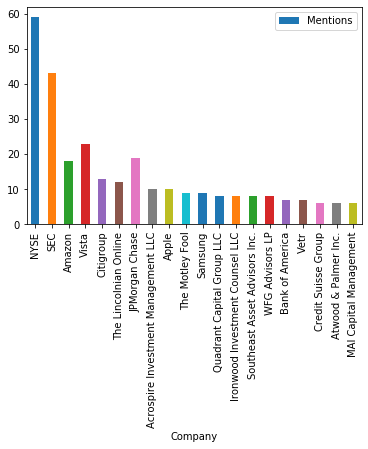

In [190]:
CompaniesChart.plot(kind='bar',x='Company',y='Mentions')